In [150]:
# Load the libraries
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Reading file

In [3]:
# load the Adult Census Income dataset

# Set the working directory
os.chdir('/home/dpandey/Lab 1 - Visualization and Data Preprocessing')

# Read in the csv file
df = pd.read_csv('adult.csv') # read in the csv file

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print (df.dtypes)
print (df.info())

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex          

In [153]:
# The percentage of individuals that make over and under 50K
# print(len(df[df.income=='<=50K'])/len(df)*100.0)
# print(len(df[df.income=='>50K'])/len(df)*100.0)
print('Under 50K %: ' + f"{round(len(df[df.income=='<=50K'])/len(df)*100.0)}")
print('Over 50K %: ' + f"{round(len(df[df.income=='>50K'])/len(df)*100.0)}")

Under 50K %: 75
Over 50K %: 25


In [7]:
# Assigning NaN where value is ? and that will show missing values in dataframe
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
# Group data by education, occupation and sex
df_grouped = df.groupby(by=['education','occupation'])
print (df_grouped.describe())

                                   age                                     \
                                 count       mean        std   min    25%   
education    occupation                                                     
10th         Adm-clerical         38.0  41.631579  15.569237  17.0  28.25   
             Craft-repair        170.0  40.623529  13.256216  17.0  29.25   
             Exec-managerial      24.0  50.041667  16.120414  25.0  39.25   
             Farming-fishing      44.0  40.727273  17.943534  17.0  26.00   
             Handlers-cleaners    71.0  31.957746  14.168815  17.0  20.50   
...                                ...        ...        ...   ...    ...   
Some-college Prof-specialty      430.0  37.979070  13.436964  18.0  26.00   
             Protective-serv     202.0  37.336634  12.368534  18.0  27.00   
             Sales              1009.0  35.287413  14.321100  18.0  22.00   
             Tech-support        273.0  36.201465  12.825170  18.0  25.00   

In [8]:
# Remove missing values from the dataframe
df.dropna(how='any', inplace=True)

In [9]:
# Check for missing values in the dataframe
print(df.isnull().values.sum())
# Check for non-missing values in each column in the dataframe
print(df.count())

0
age               30162
workclass         30162
fnlwgt            30162
education         30162
education.num     30162
marital.status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital.gain      30162
capital.loss      30162
hours.per.week    30162
native.country    30162
income            30162
dtype: int64


# Visualization

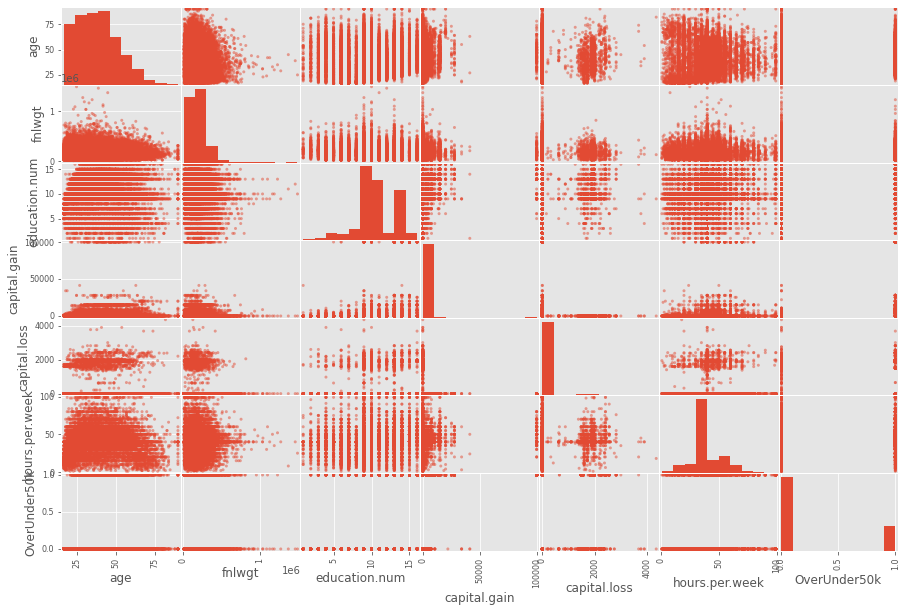

In [35]:
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df,figsize=(15, 10))

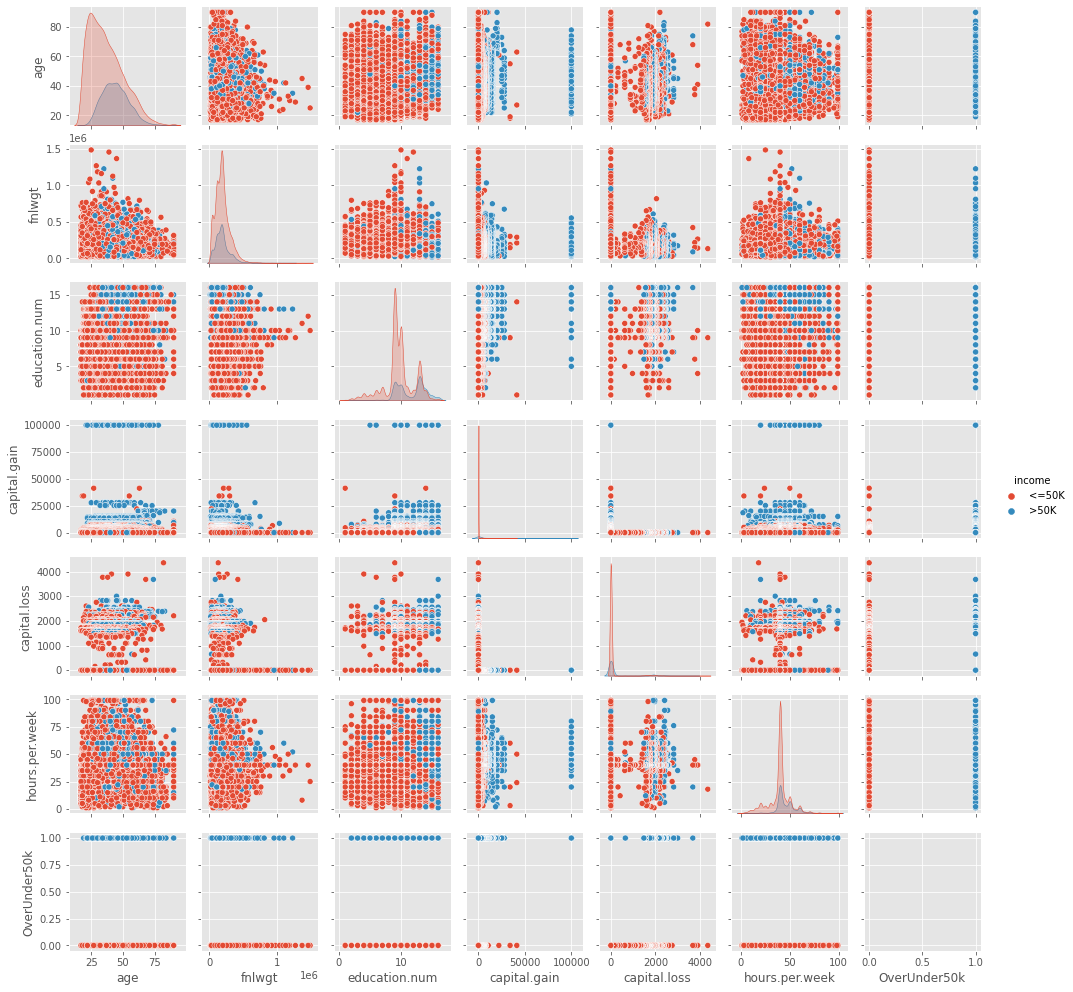

In [45]:
df_jitter = df.copy()
sns.pairplot(df_jitter, hue="income", height=2)

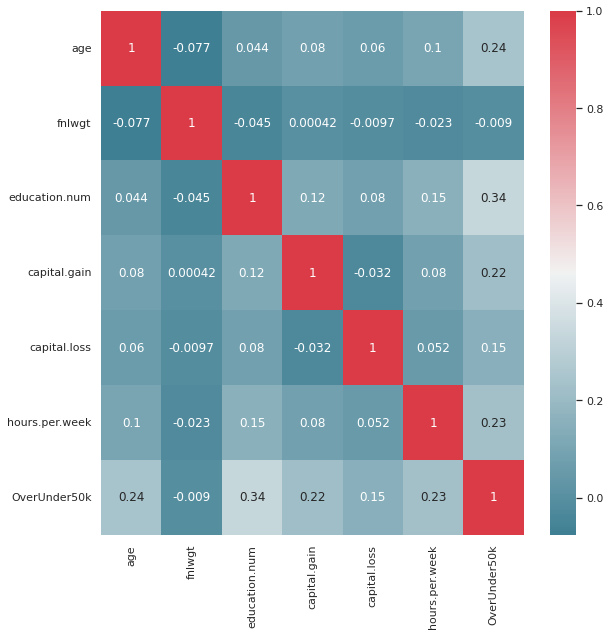

In [54]:
# plot the correlation matrix using seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

<AxesSubplot:xlabel='income', ylabel='Percentage'>

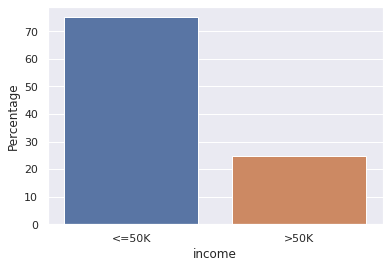

In [74]:
income_perc = df['income'].value_counts(normalize = True).mul(100).round(1).rename_axis('income').reset_index(name = 'Percentage')
sns.barplot(x = 'income', y = 'Percentage', data = income_perc)

In [70]:
# Create another column for income with numeric values for <=50K and >50K
df['OverUnder50k'] = df['income']
df['OverUnder50k'].replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
 15  OverUnder50k    30162 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.9+ MB


In [27]:
# the cross tab operator to get OverUnder50k count by sex 
over_under_50k = pd.crosstab([ df['sex']], 
                       df.OverUnder50k.astype(bool))
print (over_under_50k)

OverUnder50k  False  True
sex                      
Female         8670  1112
Male          13984  6396


<AxesSubplot:xlabel='sex'>

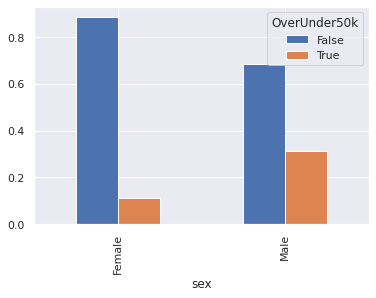

In [57]:
over50k_rate = over_under_50k.div(over_under_50k.sum(1).astype(float),
                             axis=0) # normalize the value

# print over50k_rate
over50k_rate.plot(kind='bar')

<AxesSubplot:xlabel='income', ylabel='percentage'>

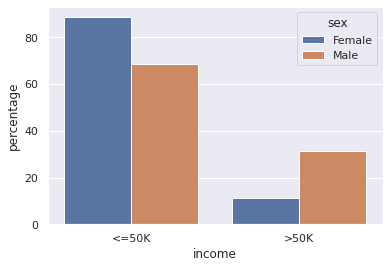

In [155]:
x, y, hue = "income", "percentage", "sex"
# x, y, hue = "sex", "percentage", "income"

#sex_perc = df[x].groupby(df[hue]).value_counts(normalize=True).mul(100).round(1).rename(y).reset_index()
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

# sex_cnt = df[x].groupby(df[hue]).value_counts().rename(y).reset_index()
# print(sex_cnt)
# print(sex_perc)

<AxesSubplot:xlabel='sex', ylabel='fnlwgt'>

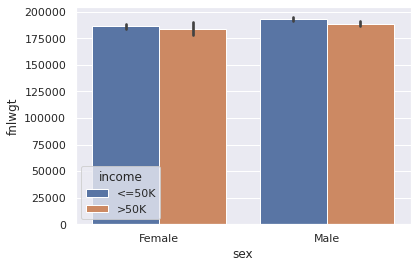

In [103]:
sns.barplot(x = 'sex', y = 'fnlwgt', hue = 'income', data = df)

<AxesSubplot:xlabel='workclass', ylabel='count'>

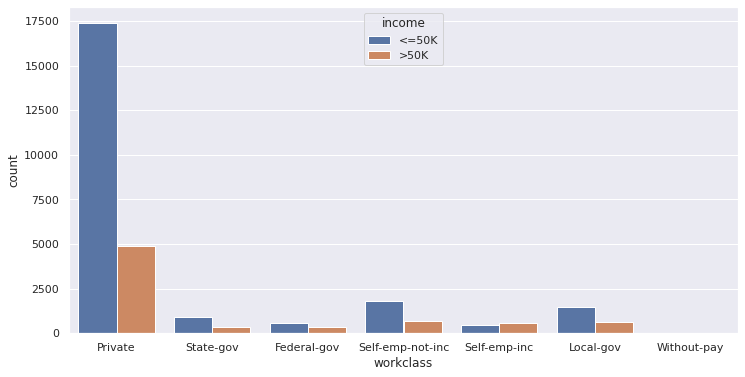

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(x="workclass", hue="income", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Preschool'),
  Text(1, 0, '1st-4th'),
  Text(2, 0, '5th-6th'),
  Text(3, 0, '7th-8th'),
  Text(4, 0, '9th'),
  Text(5, 0, '10th'),
  Text(6, 0, '11th'),
  Text(7, 0, '12th'),
  Text(8, 0, 'HS-grad '),
  Text(9, 0, 'Some-college'),
  Text(10, 0, 'Bachelors'),
  Text(11, 0, 'Masters'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, 'Prof-school'),
  Text(14, 0, 'Assoc-acdm'),
  Text(15, 0, 'Assoc-voc')])

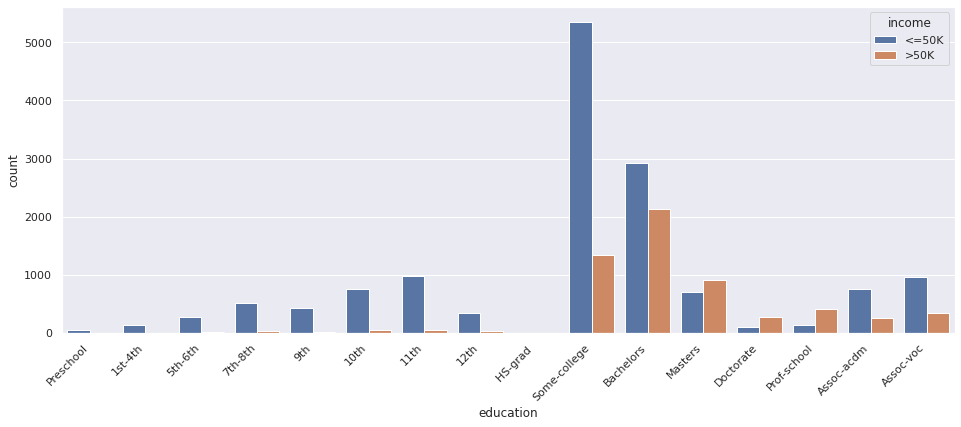

In [152]:
plt.figure(figsize=(16,6))
educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x="education", hue="income", order=educ_order, data=df)
plt.xticks(rotation = 45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Widowed'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Never-married'),
  Text(4, 0, 'Married-civ-spouse'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

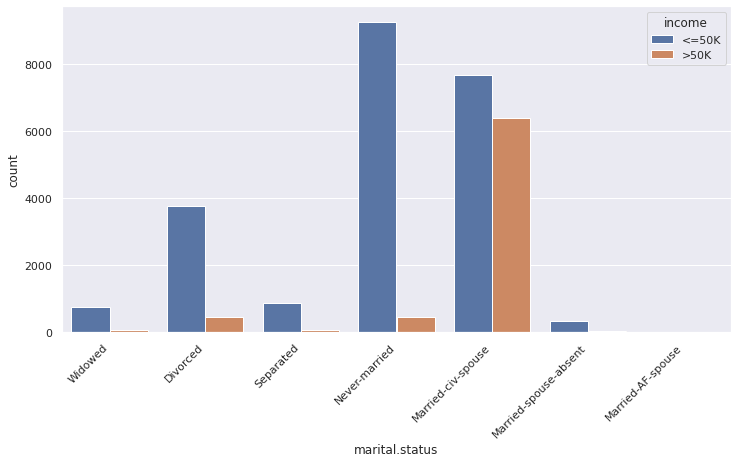

In [119]:
plt.figure(figsize=(12,6))
sns.countplot(x="marital.status", hue="income", data=df)
plt.xticks(rotation = 45, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Transport-moving'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Craft-repair'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Protective-serv'),
  Text(11, 0, 'Handlers-cleaners'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

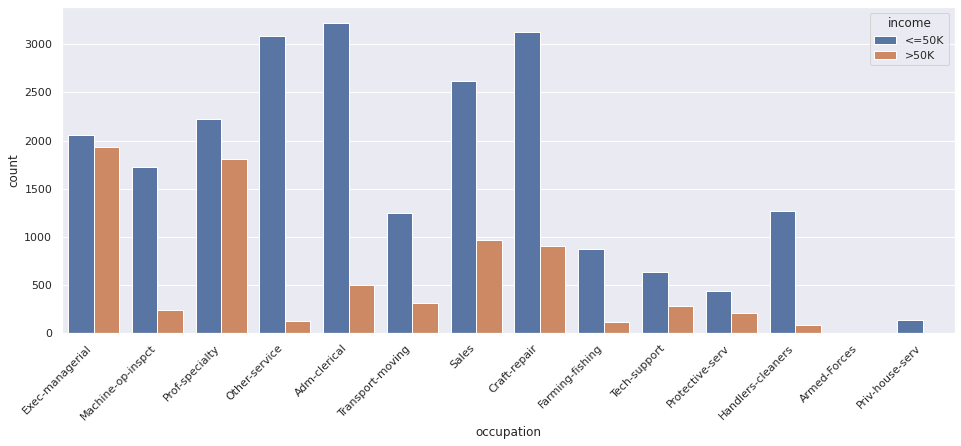

In [121]:
plt.figure(figsize=(16,6))
sns.countplot(x="occupation", hue="income", data=df)
plt.xticks(rotation = 45, ha='right')

<AxesSubplot:xlabel='relationship', ylabel='count'>

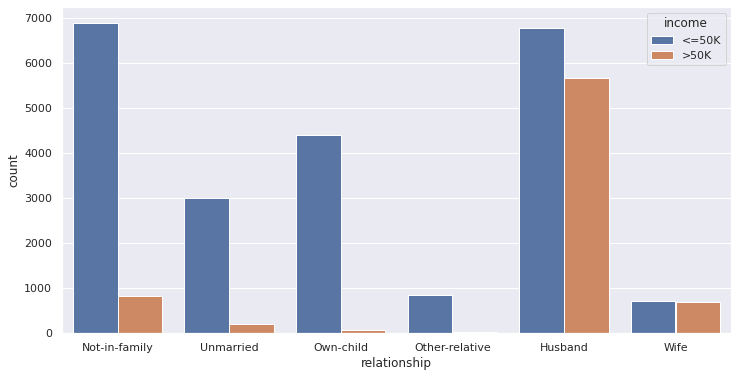

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x="relationship", hue="income", data=df)

<AxesSubplot:xlabel='race', ylabel='count'>

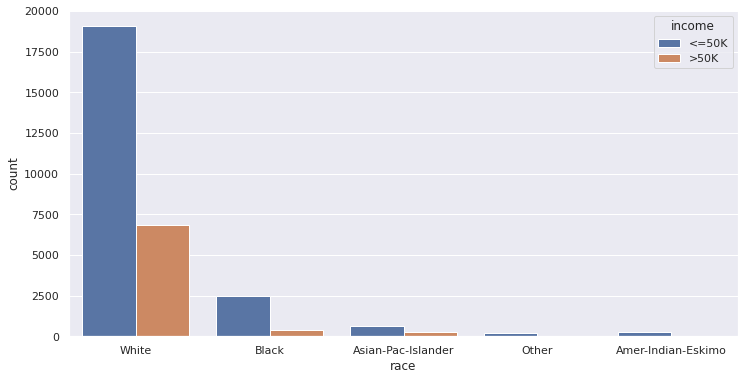

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(x="race", hue="income", data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

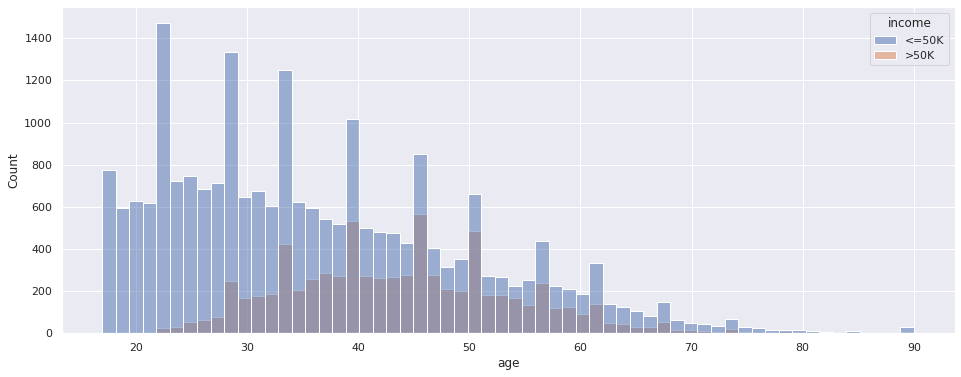

In [139]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='age', hue='income')

<AxesSubplot:xlabel='hours.per.week', ylabel='Proportion'>

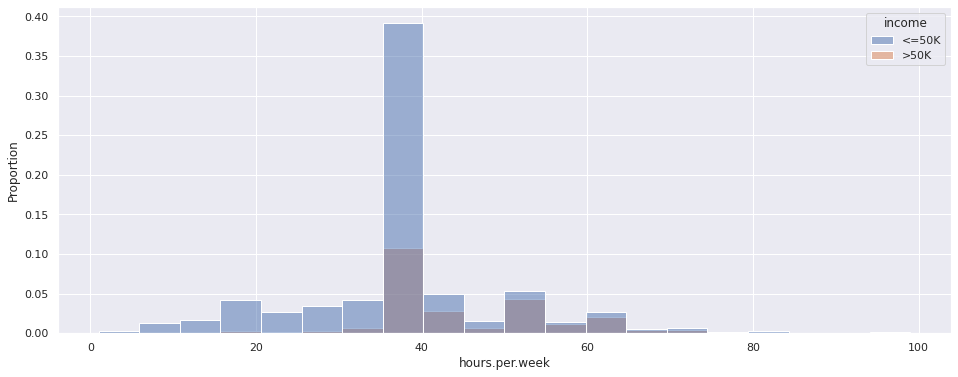

In [158]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='hours.per.week', stat='proportion', hue='income', bins=20)

In [140]:
df['native.country'].value_counts().sort_index(ascending=False)

Yugoslavia                       16
Vietnam                          64
United-States                 27504
Trinadad&Tobago                  18
Thailand                         17
Taiwan                           42
South                            71
Scotland                         11
Puerto-Rico                     109
Portugal                         34
Poland                           56
Philippines                     188
Peru                             30
Outlying-US(Guam-USVI-etc)       14
Nicaragua                        33
Mexico                          610
Laos                             17
Japan                            59
Jamaica                          80
Italy                            68
Ireland                          24
Iran                             42
India                           100
Hungary                          13
Hong                             19
Honduras                         12
Holand-Netherlands                1
Haiti                       

In [142]:
sex_cnt = df.groupby('sex')['income'].value_counts(normalize=True).mul(100).round(1)
print(sex_cnt)

sex     income
Female  <=50K     88.6
        >50K      11.4
Male    <=50K     68.6
        >50K      31.4
Name: income, dtype: float64
